# Using Artificial Neural Networks for Regression in Python
Create an ML model which can predict the apt price of a second-hand car.

In [2]:
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

CarPricesDataNumeric=pd.read_pickle('CarPricesData.pkl')
CarPricesDataNumeric.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750


## Splitting the Data into Training and Testing

Typically 70% of data is used as Training data and the rest 30% is used as Testing data.

In this same step, we are standardizing the data as well. This is important for Neural Networks because it improves the model training speed and helps to find global minima.

In [4]:
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

# Sandardization of data
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1004, 7)
(1004, 1)
(431, 7)
(431, 1)


In [5]:
from keras.models import Sequential # a sequence of ANN layers stacked one after the other
from keras.layers import Dense # each layer is defined using the “Dense” module
# how many neurons would be there, which technique would be used to initialize the weights, what will be the activation function

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
# units=5: we are creating a layer with 5 neurons in it
# input_dim=7: there are 7 predictors which is expected by the first layer
# kernel_initializer='normal': some algorithm has to decide the value for each weight. ‘normal’ / ‘glorot_uniform’ etc.
# you can choose values like ‘relu’, ‘tanh’, ‘sigmoid’ for activation func.

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

# batch_size=20: This specifies how many rows will be passed to the Network in one go after which the SSE calculation will begin
# and the neural network will start adjusting its weights based on the errors.
# When all the rows are passed in the batches of 20 rows each as specified in this parameter, then we call that 1-epoch.
# Or one full data cycle. This is also known as mini-batch gradient descent.

# A small value of batch_size will make the ANN look at the data slowly which could lead to overfitting,
# as compared to a large value which will make the ANN look at the data fast which could lead to underfitting

# Epochs=50: The same activity of adjusting weights continues for 50 times, as specified by this parameter.
# ANN looks at the full training data 50 times and adjusts its weights.

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0986
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 0.9606
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.8399
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 0.4911
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.3143
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.2402
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 0.2243
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 0.1844
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.1932
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.1660
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.1819
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 0.1567
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.1704
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.1569
Epoch 15/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.1647


## Finding best set of parameters using manual grid search

This is a simple for loop based approach.

In [7]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyperparameters to try
    batch_size_list = [5, 10, 15, 20]
    epoch_list = [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData = pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # Initializing the trials
    TrialNumber = 0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber += 1
            # Create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # Output layer for single number prediction
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the training set
            model.fit(X_train, y_train, batch_size=batch_size_trial, epochs=epochs_trial, verbose=0)

            # Mean Absolute Percentage Error (MAPE)
            MAPE = np.mean(100 * (np.abs(y_test - model.predict(X_test)) / y_test))
            
            # Printing the results of the current iteration
            print(TrialNumber, 'Parameters:', 'batch_size:', batch_size_trial, '-', 'epochs:', epochs_trial, 'Accuracy:', 100 - MAPE)
            
            new_row = pd.DataFrame(data=[[TrialNumber, str(batch_size_trial) + '-' + str(epochs_trial), 100 - MAPE]],
                                   columns=['TrialNumber', 'Parameters', 'Accuracy'])
            SearchResultsData = pd.concat([SearchResultsData, new_row], ignore_index=True)
    
    return SearchResultsData

ResultsData = FunctionFindBestParams(X_train, y_train, X_test, y_test)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 40.62797432943827


/var/folders/dc/m_wsl0810j771hk0hm8v_fxh0000gn/T/ipykernel_8187/1758107164.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  SearchResultsData = pd.concat([SearchResultsData, new_row], ignore_index=True)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 45.14618536756323
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 67.68011536498739
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 53.55865218016207
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 35.760433742113335
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 40.11867897195495
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 53.33165867523841
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 53.13528360613318
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 50.97899132631014
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 36.21842545405001
14

<Axes: xlabel='Parameters'>

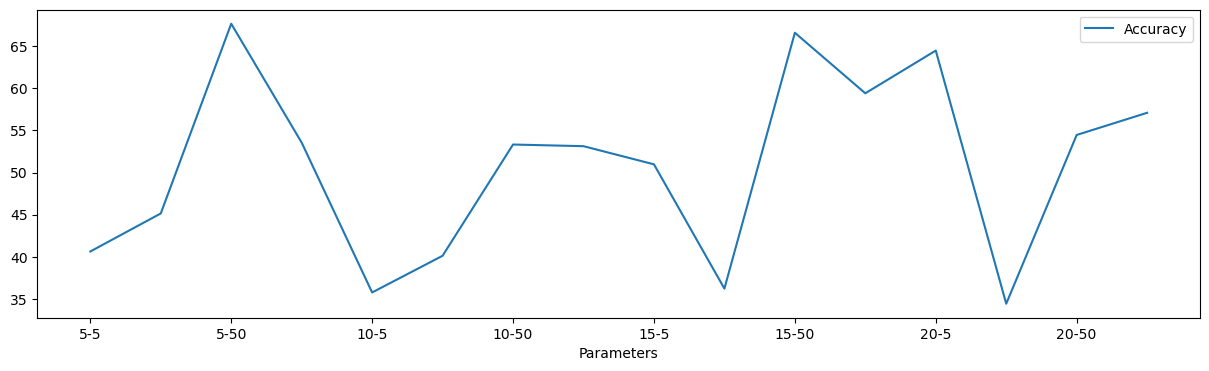

In [8]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15, 4), kind='line')
# This graph shows that the best set of parameters are batch_size=15 and epochs=5

## Training the ANN model with the best parameters & Finding the accuracy of the model

In [10]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 15, epochs = 5, verbose=0)

# Generating Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9788.305664
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,10035.981445
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8546.013672
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9194.230469
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8921.487305


Using the final trained model, now we are generating the prediction error for each row in testing data as the Absolute Percentage Error. Taking the average for all the rows is known as Mean Absolute Percentage Error(MAPE). The accuracy is calculated as 100-MAPE.

In [12]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 91.06895833737889


,Age,KM,Weight,HP,MetColor,CC,Doors,Price,PredictedPrice,APE
0,59.0,80430.0,1065.0,110.0,1.0,1600.0,3.0,9950.0,9788.305664,1.625069
1,62.0,64797.0,1075.0,110.0,1.0,1600.0,5.0,7995.0,10035.981445,25.528223
2,59.0,130000.0,1135.0,72.0,1.0,2000.0,4.0,7500.0,8546.013672,13.946849
3,69.0,42800.0,1050.0,110.0,1.0,1600.0,3.0,9950.0,9194.230469,7.595674
4,65.0,47014.0,1015.0,86.0,1.0,1300.0,3.0,8950.0,8921.487305,0.318578


### Finding best hyperparameters using GridSearchCV (Grid Search Cross-validation).

In [14]:
def make_regression_ann(optimizer='adam'):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

###########################################
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

# Listing all the parameters to try
Parameter_Trials = {
    'batch_size': [10, 20, 30],
    'epochs': [10, 20],
    'optimizer': ['adam', 'rmsprop']  # Use 'optimizer' instead of 'Optimizer_trial'
}

# Creating the regression ANN model
RegModel = KerasRegressor(make_regression_ann, verbose=0)

###########################################
from sklearn.metrics import make_scorer
import numpy as np

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    print('#' * 70, 'Accuracy:', 100 - MAPE)
    return 100 - MAPE

custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

#########################################
# Creating the Grid search space
grid_search = GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)

#########################################
# Measuring how much time it took to find the best params
import time
StartTime = time.time()

# Running Grid Search for different parameters (Assuming X, y are predefined datasets)
grid_search.fit(X, y, verbose=1)

EndTime = time.time()
print("########## Total Time Taken: ", round((EndTime - StartTime) / 60), 'Minutes')

print('### Printing Best parameters ###')
print(grid_search.best_params_)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 0.3760
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - loss: 0.1765
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - loss: 0.1209
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 0.1230
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - loss: 0.1103
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - loss: 0.0991
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 0.1048
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 0.0995
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - loss: 0.0913
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - loss: 0.0926
###################################################################### Accuracy: 19.813711855694194
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.2449
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - loss: 0.9289
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - loss: 0.3810
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.1571
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1350
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.1321
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - loss: 0.1206
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - loss: 0.1231
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 0.1396
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 0.1079
###################################################################### Accuracy: -124.2023556958714
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.0892 
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.7909
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.2478
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1406
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.1358
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1355
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.1396
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1199
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.1429
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.1139
###################################################################### Accuracy: 120.3533443158712
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 1.2602
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 1.0235
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.3594
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.1568
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1468
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.1496
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1343
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1226
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1311
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1322
###################################################################### Accuracy: 81.88284707678534
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.0693
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 1.0170
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.4658
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.2873
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.2355
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - loss: 0.1874
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1916
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1689
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.1572
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 0.1723
###################################################################### Accuracy: 139.40704826131753
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.3705
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.3244
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.2843
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.2516
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.2522
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.2462
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.2690
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.2626
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.2552
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.2422
###################################################################### Accuracy: -48.65619521184399
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 1.0717
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.8998
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.5862
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.3233
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.2199
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.1894
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.1684
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.1539
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.1352
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.1346
###################################################################### Accuracy: -135.20431440898108
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 1.2634
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 1.0262
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.4333
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1907
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1403
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1300
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1450
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1166
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1294
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 0.1260
###################################################################### Accuracy: 122.83811371296802
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 0.9713
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - loss: 0.8635
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.2978
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.1642
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 0.1436
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 0.1522
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.1225
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 0.1274
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.1294
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.1170
###################################################################### Accuracy: 91.1929912358575
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.0212
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 0.8664
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.3327
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 0.2117
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.1526
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1390
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.1472
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.1250
Epoch 9/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 0.1228
Epoch 10/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.1536
###################################################################### Accuracy: 127.55825692690843
Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 0.3571
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.1888
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.1192
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 0.1082
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 0.1033
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.1026
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1007
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.0976
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.0935
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.0953
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.0904
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.0840
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.0902
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.0955
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.2141
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 0.9477
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.2966
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 0.1307
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.1172
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.1264
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1680
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.1454
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 0.1374
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.1202
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.1137
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.1367
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.1288
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.1091
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.2069
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 1.0613
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.7736
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.8525
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.8395
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.6372
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.6224
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.6040
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.4866
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.5249
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.6021
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.5180
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.4014
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.4197
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.1506
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 0.9404
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.9556
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.7766
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.6383
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.6035
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.5733
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.6206
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 0.5678
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - loss: 0.5671
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.4476
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - loss: 0.4869
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - loss: 0.4676
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - loss: 0.4294
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.1095
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.7848
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.2660
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.1934
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.1447
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.1431
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.1248
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 0.1260
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.1423
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.1207
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 0.1492
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.1066
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1118
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1196
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 0.3410
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.2201
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.1077
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.0860
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.0809
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.0819
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.0781
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.0768
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.0779
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.0928
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.0773
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.0710
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.0786
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.0775
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.1484
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - loss: 0.9408
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.4004
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.1627
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.1522
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.1111
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.1190
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.1234
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.1356
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.1145
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.1180
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.1117
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.1176
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 0.1012
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.0866
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.8705
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.4746
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1755
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1559
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.1326
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 0.1256
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 0.1271
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.1412
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.1250
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.1226
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.1200
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1179
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1160
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 1.1164
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.6963
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.3050
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.2259
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.2296
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.1826
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.1911
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.1702
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1578
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.1845
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.1407
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1498
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1281
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1551
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 0.9107
Epoch 2/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 1.0704
Epoch 3/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.6731
Epoch 4/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.3473
Epoch 5/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.1932
Epoch 6/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.1696
Epoch 7/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1661
Epoch 8/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1318
Epoch 9/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.1501
Epoch 10/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.1250
Epoch 11/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.1325
Epoch 12/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1191
Epoch 13/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.1384
Epoch 14/20
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1253
Epoch 15/20
115/115 ━━━━━━━━━━━━━━━━━━━━

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 0.3626
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 0.3168
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.2082
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.1269
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.1346
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.1083
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 0.0825
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 0.0846
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.0816
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 0.0781
###################################################################### Accuracy: 33.609607326158795
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 1.2465
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.2452
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.0291
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 0.8647
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 0.7832
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 0.7664
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 0.8388
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 0.6289
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.7339
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 0.6117
###################################################################### Accuracy: -21.30756862122938
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.1012
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.1064
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.9861
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.5492
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.2563
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.1831
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.1567
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.1592
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 0.1451
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.1358
###################################################################### Accuracy: 116.58304458710542
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.1013
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.0089
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.8631
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 0.4836
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 0.2402
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 0.1849
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.1501
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.1542
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.1523
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.1523
###################################################################### Accuracy: 93.86973321632091
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.1173
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.9742
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 0.7683
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 0.3848
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.1955
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 0.1659
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 0.1609
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 0.1387
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.1239
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 0.1651
###################################################################### Accuracy: 127.74263794332492
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 0.3636
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 0.3128
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 0.2815
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 0.1917
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.1801
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.1366
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.1240
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.1223
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1228
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.1117
###################################################################### Accuracy: -2.824899559898512
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.3059 
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.2025
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 0.9811
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.4920
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.2072
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.1411
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.1567
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.1321
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.1453
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.1275
###################################################################### Accuracy: -175.6003047473174
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.2531
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 1.0720
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.9248
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.6493
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.4567
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 0.2198
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.1770
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.1473
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.1393
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1323
###################################################################### Accuracy: 123.46381164333982
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1263
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 1.0941
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.9326
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.5092
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.2777
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.2469
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.1575
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.1569
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1558
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.1440
###################################################################### Accuracy: 92.30318633778596
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.0552
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.0188
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.8571
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.4585
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.3040
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.2066
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.1819
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1417
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.1344
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.1506
###################################################################### Accuracy: 128.4371401735253
Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 0.3610
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 0.3340
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.2468
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 0.1641
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 0.1102
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.1126
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.0839
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.0809
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.0843
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.0834
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.0764
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.0843
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.0820
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.0845
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.0726


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.0910
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.1724
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 1.0341
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.8000
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.9084
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.7783
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.6967
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.7271
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.7295
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.7033
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.6487
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.5627
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.5595
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.5109
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 0.4984


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.2089
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 1.0285
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.8582
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.3815
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.2413
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.1576
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.1501
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.1318
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.1422
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.1255
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1393
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.1177
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1237
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.1292
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.1281


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.0919
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.0694
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 1.1165
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.8241
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.8439
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.7134
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.6864
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.8791
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.6230
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - loss: 0.6754
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.5867
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.5645
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.5090
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.5190
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.5379


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.1278 
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 1.0019
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.9660
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.4508
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 0.2253
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.2220
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.1714
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.1379
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.1623
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.1892
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1362
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1469
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.1292
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 0.1394
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.1349

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 0.3832
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.3078
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1951
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1552
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1294
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.1263
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.1202
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.1002
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 0.1218
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.1055
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1025
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.1135
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.0959
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.1033
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.0917


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.1322
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 1.0692
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.8778
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.6049
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 0.3563
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.1875
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.1673
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.1322
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.1160
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.1064
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 0.1125
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 0.1256
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.1228
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.1098
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.1136


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.1578 
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 1.0222
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.7196
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.4286
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.3295
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.2766
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.2359
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.2223
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.2220
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 0.2077
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1850
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.1804
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1615
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1695
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.1543

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.1846
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 1.0774
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.9233
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 1.0191
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.8931
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.6484
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.8061
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.7254
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.6349
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.7534
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.6155
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.6508
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 0.6359
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.6198
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.5218


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.1130
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 1.1125
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.8894
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.4758
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.2362
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.1943
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.1668
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.1412
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.1714
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.1462
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 0.1449
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 0.1300
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1220
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.1504
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1161


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.3825
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 0.3600
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.3195
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.2414
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1766
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.1318
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 0.1136
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 0.1325
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 0.1191
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 0.1252
###################################################################### Accuracy: -7.819341737156037
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.2151
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.1060
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 1.1645
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 0.9908
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.7634
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 0.4912
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.4726
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 0.3041
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.1968
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.1510
###################################################################### Accuracy: -148.65700810291185
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.0427
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.1265
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.0890
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 1.0106
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.7034
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 0.4027
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.2505
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.1859
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.1560
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.1407
###################################################################### Accuracy: 118.93850086295058
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.1847
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.1741
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.2606
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 1.0536
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.9060
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 0.9556
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.7092
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 0.7497
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 0.6954
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 0.6429
###################################################################### Accuracy: 117.90818389470338
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.1198
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.0168
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 0.8618
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.7335
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.3538
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.2579
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 0.1990
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 0.1727
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.1427
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.1378
###################################################################### Accuracy: 131.4047847946507
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.3851
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 0.3282
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.2612
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 0.1862
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.1549
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 0.1188
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.1230
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.0994
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.0997
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.0957
###################################################################### Accuracy: 17.327372144704995
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.1774
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.0746
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 1.1902
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.9085
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.6636
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.3439
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 0.1940
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.1424
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 0.1366
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 0.1262
###################################################################### Accuracy: -172.53930582702435
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.1941
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.2243
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.1669
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.8118
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 0.6514
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 0.3801
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 0.2215
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 0.1523
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.1467
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.1516
###################################################################### Accuracy: 116.86404274612809
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.0841
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.0466
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.0402
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.9175
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 0.6769
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 0.4283
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.2882
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.1919
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.1721
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.1430
###################################################################### Accuracy: 80.99560163899238
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.0373
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.0990
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 1.0746
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 0.8728
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.6456
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.4057
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.2487
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 0.1938
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1637
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 0.1701
###################################################################### Accuracy: 129.19000551118938
Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.3697
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 0.3404
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.2922
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.1970
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.1286
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 0.1119
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.1033
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 0.0962
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.0963
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.0882
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.0846
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.0811
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.0825
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 0.0840
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.0789


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.1935
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.2347
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 1.0458
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.9863
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.5804
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.3767
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.2759
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 0.2421
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 0.1959
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.1627
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 0.1536
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.1517
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.1384
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 0.1340
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 0.1266


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.1831
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.1508
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 1.1641
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 0.8758
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 0.5913
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.3272
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.2105
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.1568
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.1467
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.1469
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.1419
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 0.1432
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 0.1422
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 0.1298
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1418


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.2024
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.0862
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 1.0827
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 0.7539
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 0.4945
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.2612
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 0.2148
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 0.1746
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 0.1790
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 0.1422
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.1401
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 0.1250
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 0.1813
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 0.1268
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 0.1203


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.0998
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.0514
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.1372
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.8464
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 0.8585
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.5709
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.3968
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.3272
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 0.2649
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.1838
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.1466
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.1620
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 0.1318
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 0.1473
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 0.1357


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 0.3800
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 0.3327
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 0.2658
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.1771
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.1384
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.1344
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 0.1302
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 0.1101
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 0.1219
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.1080
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 0.1015
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.1058
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 0.1070
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.1019
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.1031


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.1523
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.4040
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 1.0639
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.8955
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.7635
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.6008
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.4308
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 0.2730
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 0.1845
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 0.1702
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 0.1651
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 0.1362
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.1374
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 0.1254
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 0.1170


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.2310
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.0734
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 1.1014
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 0.9095
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 0.7320
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 0.4619
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 0.2459
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.2000
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.1775
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.1623
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.1543
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.1590
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.1373
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 0.1469
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.1268


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1636
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.1626
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 0.9567
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 0.7566
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 0.4794
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 0.2467
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 0.2032
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 0.1702
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 0.1538
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 0.1595
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 0.1311
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 0.1638
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 0.1434
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.1290
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 0.1100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 1.0846
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.0082
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 0.8711
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 0.7925
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 0.4837
Epoch 6/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 0.3045
Epoch 7/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 0.2404
Epoch 8/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 0.1978
Epoch 9/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 0.1683
Epoch 10/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.1527
Epoch 11/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 0.1791
Epoch 12/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 0.1379
Epoch 13/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.1354
Epoch 14/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 0.1525
Epoch 15/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.1608


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.9037
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.9441
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 0.7673
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 0.4267
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 0.2728
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 0.1772
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 0.1570
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 0.1604
Epoch 9/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.1534
Epoch 10/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 0.1285
Epoch 11/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 0.1463
Epoch 12/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 0.1097
Epoch 13/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 0.1206
Epoch 14/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 0.1199
Epoch 15/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 0.1205
